In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [149]:
# importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
# Cargar dataset
data = pd.read_excel('Documents/vehiculo.xlsx')


# 1.	Realizar un análisis exploratorio de los datos

In [153]:
data.head(40)

,Model,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,42450,Diesel,Dealer,Manual
5,vitara brezza,2018,9.25,2071,Diesel,Dealer,Manual
6,ciaz,2015,6.75,18796,Petrol,Dealer,Manual
7,s cross,2015,6.50,33429,Diesel,Dealer,Manual
8,ciaz,2016,8.75,20273,Diesel,Dealer,Manual
9,ciaz,2015,7.45,42367,Diesel,Dealer,Manual


In [154]:
data.describe()

,Year,Selling_Price,Kms_Driven
count,14828.000000,1.482800e+04,1.482800e+04
mean,2013.955692,7.338985e+05,6.593197e+04
std,4.121330,1.195352e+06,5.404873e+04
min,1983.000000,1.000000e-01,0.000000e+00
25%,2012.000000,2.500000e+05,3.200000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,7.150000e+05,9.000000e+04
max,2022.000000,3.500000e+07,2.360457e+06


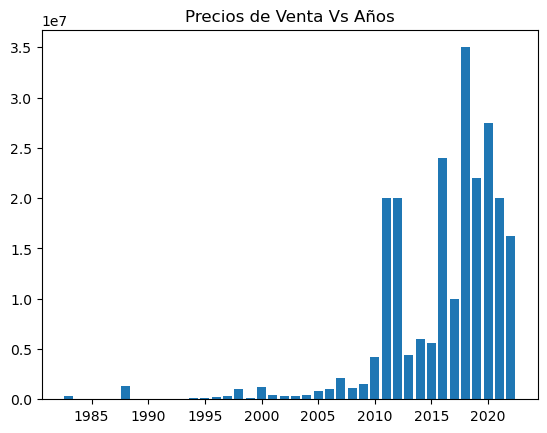

In [158]:
#Graficos de barras Precio de venta Vs años

plt.bar(data['Year'], data['Selling_Price'])
plt.title('Precios de Venta Vs Años')
plt.show()


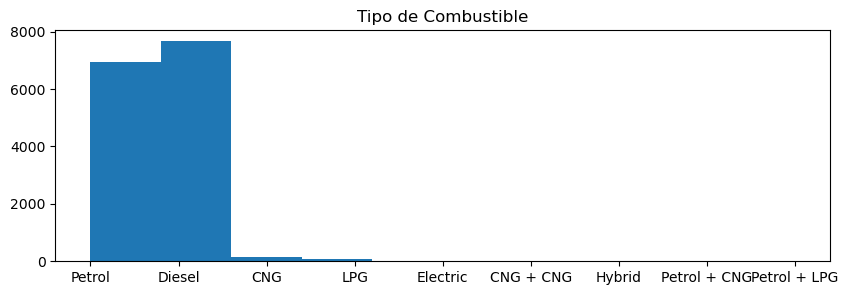

In [159]:
# Grafico histograma Tipo de Combustible

plt.figure(figsize=(10,3))
plt.hist(data['Fuel_Type'])
plt.title('Tipo de Combustible')
plt.show()

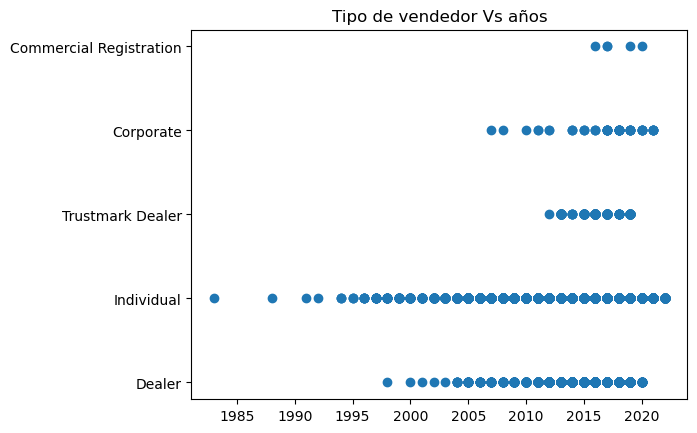

In [160]:
# Grafico aspersion Tipo de vendedor Vs años

plt.scatter(data['Year'], data['Seller_Type'])
plt.title('Tipo de vendedor Vs años')
plt.show()

Text(0.5, 1.0, 'Precio de Venta')

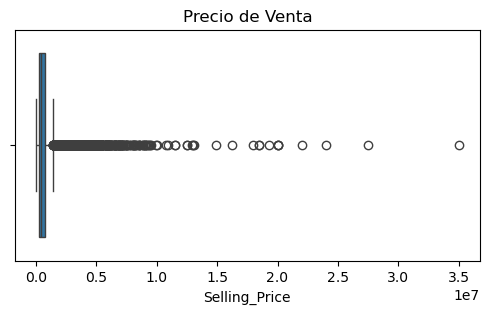

In [161]:
#Grafico de los datos 

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Selling_Price'])
plt.title('Precio de Venta')

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          14828 non-null  object 
 1   Year           14828 non-null  int64  
 2   Selling_Price  14828 non-null  float64
 3   Kms_Driven     14828 non-null  int64  
 4   Fuel_Type      14828 non-null  object 
 5   Seller_Type    14828 non-null  object 
 6   Transmission   14828 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 811.0+ KB


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [164]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Model: ",data['Model'].isin([0]).sum())
print("Cantidad de Registros con cero en Year: ",data['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Selling_Price: ",data['Selling_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kms_Driven: ",data['Kms_Driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Fuel_Type: ",data['Fuel_Type'].isin([0]).sum())
print("Cantidad de Registros con cero en Seller_Type: ",data['Seller_Type'].isin([0]).sum())
print("Cantidad de Registros con cero en Transmission: ",data['Transmission'].isin([0]).sum())


Cantidad de Registros con cero en Model:  0
Cantidad de Registros con cero en Year:  0
Cantidad de Registros con cero en Selling_Price:  0
Cantidad de Registros con cero en Kms_Driven:  1
Cantidad de Registros con cero en Fuel_Type:  0
Cantidad de Registros con cero en Seller_Type:  0
Cantidad de Registros con cero en Transmission:  0


In [165]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

data['Kms_Driven']=data['Kms_Driven'].replace(0,data['Kms_Driven'].mean())


In [166]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Kms_Driven: ",data['Kms_Driven'].isin([0]).sum())

Cantidad de Registros con cero en Kms_Driven:  0


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [168]:
 #1   Year           14828 non-null  int64  
 #2   Selling_Price  14828 non-null  float64

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [170]:
# Porcentaje de datos para el train 80%, para el text 20%

#X= data.drop(columns='Selling_Price', axis=1)
#Y= data['Selling_Price']

X=df['Selling_Price'].values
Y=df['Selling_Price'].values

X=X.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state =0)



In [171]:
print (X_train)

[[8900000.]
 [ 100000.]
 [ 145000.]
 ...
 [ 600000.]
 [ 480000.]
 [  64000.]]


In [172]:
print (Y_train)

[8900000.  100000.  145000. ...  600000.  480000.   64000.]


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

Intercepto (β0):-211587421.91621774
Coeficiente (Year,β1):[105425.0206574]


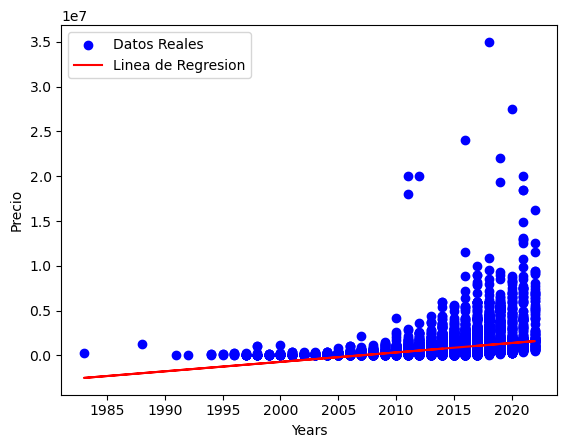

In [174]:
df= pd.DataFrame(data)

#VAriables independiente e dependiente
X= df[['Year']]
Y= df['Selling_Price']

#Regression Lineal
modelo= LinearRegression()

#Datos al modelo
modelo.fit(X,Y)

#Coeficiente de regresion
beta_0 = modelo.intercept_ 
beta_1= modelo.coef_

#Coeficientes
print(f"Intercepto (β0):{beta_0}")
print(f"Coeficiente (Year,β1):{beta_1}")

#Visualizar regresion simple
plt.scatter(df['Year'],Y, color="blue", label='Datos Reales')
plt.plot(df['Year'], modelo.predict(X), color='red', label ='Linea de Regresion')
plt.xlabel('Years')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [175]:
#Predecir precios para proximos años
nuevo_X = np.array ([[2025],[2026]]) # Nuevos valor 
prediccion= modelo.predict(nuevo_X)

#Visualizar
print ("\nPrediccion:")
for i, pred in enumerate(prediccion):
    print(f"Prediccion {i+1} para (Año: {nuevo_X[i][0]}): {pred:.2f}")
          



Prediccion:
Prediccion 1 para (Año: 2025): 1898244.92
Prediccion 2 para (Año: 2026): 2003669.94


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [176]:
#Regresion lineal Multiple



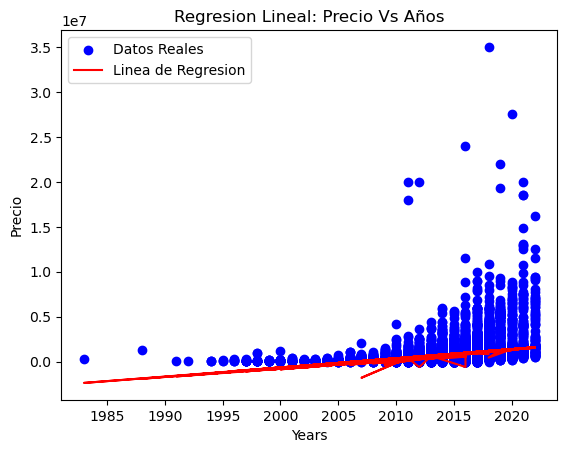

In [178]:
df= pd.DataFrame(data)

#VAriables dependiente e independiente
X= df[['Year','Kms_Driven']]
Y= df['Selling_Price']

#Regression Lineal
modelo= LinearRegression()

#Datos al modelo ajustar
modelo.fit(X,Y)

#Coeficiente de regresion
beta_0 = modelo.intercept_ 
beta_1, beta_2 = modelo.coef_

#Visualizar regresion simple
plt.scatter(df['Year'],Y, color="blue", label='Datos Reales')
plt.plot(df['Year'], modelo.predict(X), color='red', label ='Linea de Regresion')
plt.title('Regresion Lineal: Precio Vs Años')
plt.xlabel('Years')
plt.ylabel('Precio')
plt.legend()
plt.show()





# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas

In [180]:
2#Predicciones

df= pd.DataFrame(data)

#VAriables dependiente e independiente
X= df[['Year','Kms_Driven']]
y= df['Selling_Price']

#Regression Lineal
model= LinearRegression()

#Datos al modelo
model.fit(X,y)

#Predicciones con los datos del modelo
predicciones = model.predict(X)

#Coeficientes
print(f"Intercepto (β0):{beta_0}")
print(f"Coeficiente (Year,β1):{beta_1}")
print(f"Coeficiente (Kms_Driven,β2):{beta_2}")

#Calcular Metricas 
r2 = r2_score(y, predicciones) # coeficiente determinacion R^2
mae = mean_absolute_error(y, predicciones) # error absoluto medio
mse = mean_squared_error(y, predicciones) # error cuadratico medio
rmse = np.sqrt(mse) # raiz del error cuadratico medio

#Visualizar las metricas
print(f'R^2 (Coeficiente de determinacion):{r2}')
print(f'Error Absoluto Medio (MAE):{mae}')


Intercepto (β0):-203111084.20959198
Coeficiente (Year,β1):101242.10454776592
Coeficiente (Kms_Driven,β2):-0.7906101270097899
R^2 (Coeficiente de determinacion):0.13319035577725846
Error Absoluto Medio (MAE):537584.0104776424


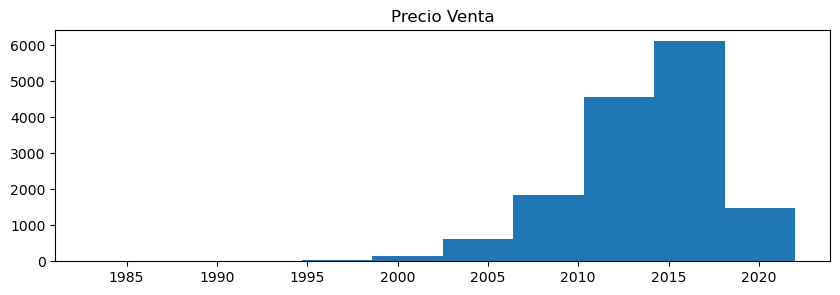

In [233]:
plt.figure(figsize=(10,3))
plt.hist(df['Year'])
plt.title('Precio Venta')
plt.show()